<a href="https://colab.research.google.com/github/zzwony/Start_0920/blob/main/%ED%86%B5%EA%B3%84_1223_%EB%AC%B8%EC%A0%9C_%EC%B5%9C%EC%A7%80%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 통계
- 평가일 : 22.12.23
- 성명 :
- 점수 :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Q1. df에서 mathematics 점수의 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, IQR을 구하세요.

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [ ]:
scores = df['mathematics']
scores.head()

student number
1    65
2    80
3    63
4    63
5    76
Name: mathematics, dtype: int64

In [ ]:
type(scores)

pandas.core.series.Series

In [ ]:
data = df.mathematics.describe()

In [ ]:
# 평균값
print('평균값:', data.mean())

# 중앙값
print('중앙값:', np.median(data))

# 최빈값
print('최빈값:', np.min(data))

# 분산
print('분산:', np.var(data))

# 표준편차
print('표준편차:', np.std(data))

# 범위
data['max'] - data['min']

# IQR
data['75%'] - data['25%']

평균값: 66.03679632543762
중앙값: 77.44
최빈값: 8.414370603500968
분산: 652.873535154301
표준편차: 25.551390082621747


8.0

Q2. df.english를 표준화한 후 배열로 변환하여 처음 5개 원소를 출력하세요.

In [ ]:
score = df.english
type(score)

pandas.core.series.Series

In [ ]:
a = (score - np.mean(score)) / np.std(score)
a[:5]

student number
1   -1.688430
2    1.094696
3   -0.245327
4   -1.791509
5   -0.142249
Name: english, dtype: float64

Q3. score에 대하여 다음사항을 수행하세요.
- 상자그림으로 시각화하여 이상치 여부를 탐색
- 이상치 값 및 인덱스 출력
- 이상치 삭제
- 상자그림으로 시각화하여 이상치 제거 여부 재확인.

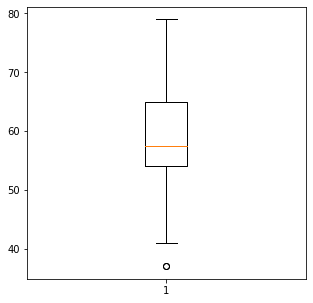

In [ ]:
# 상자그림으로 시각화하여 이상치 여부를 탐색
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.boxplot(score)
plt.show()

In [ ]:
# 이상치 값 및 인덱스 출력
s = score.describe()
iqr = s['75%'] - s['25%']
i_chk = s['25%'] - 1.5 * iqr
i = score[score > i_chk].min()
i_idx = score[score < i].index

print('이상치 값:', score[score < i_chk].values[0])
print('이상치 인덱스:', i_idx)

이상치 값: 37
이상치 인덱스: Int64Index([20, 35], dtype='int64', name='student number')


In [ ]:
# 이상치 삭제

In [ ]:
del_i = score.drop(i_idx)

In [ ]:
# 상자그림으로 시각화하여 이상치 제거 여부 재확인.

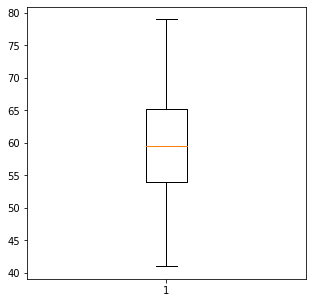

In [ ]:
plt.figure(figsize=(5,5))
plt.boxplot(del_i)
plt.show()

Q4. 아래 scores_df에 대해서 아래사항을 수행하세요
- scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
- scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
- 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력) 
- 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ch2_scores_em.csv',
                 index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [ ]:
# scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력

In [ ]:
e_scores = scores_df.english
m_scores = scores_df.mathematics
print('공분산:', np.cov(e_scores, m_scores)[0,1].round(2))

공분산: 69.78


In [ ]:
# scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력

In [ ]:
print('상관계수:', np.corrcoef(e_scores, m_scores)[0,1].round(2))

상관계수: 0.82


In [ ]:
# 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력)

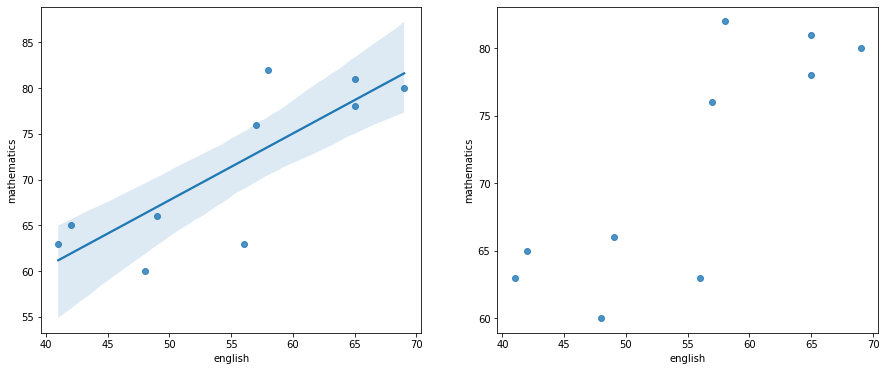

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(15,6), sharex=True)
sns.regplot(ax=axes[0], x=scores_df.english, y=scores_df.mathematics)
sns.regplot(ax=axes[1], x=scores_df.english, y=scores_df.mathematics, fit_reg=False)
plt.show()

In [ ]:
# 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)

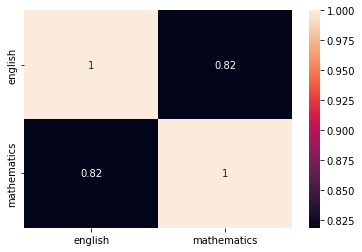

In [ ]:
sns.heatmap(scores_df[['english', 'mathematics']].corr(), annot=True)

Q5. 아래 scores는 전교생의 시험점수이다. 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화를 수행하세요.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

Text(0, 0.5, 'Relative Frequency')

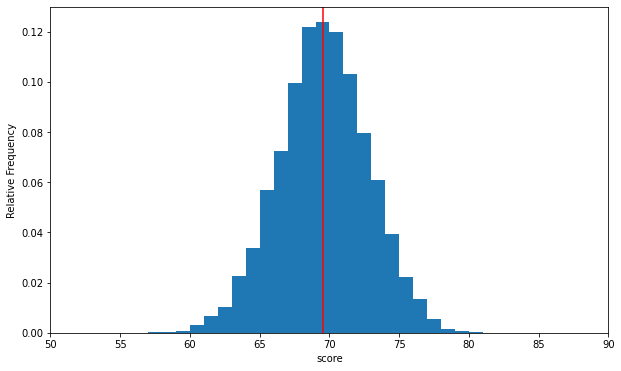

In [ ]:
import matplotlib.pyplot as plt

sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]
plt.figure(figsize=(10,6))

plt.hist(sample_means, bins=100, range=(0, 100), density=True)
plt.vlines(np.mean(scores), 0, 1, 'red')
plt.axis([50, 90, 0, 0.13])
plt.xlabel('score')
plt.ylabel('Relative Frequency')

Q6. 다음을 수행하세요
- 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요. 
- 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요. 

In [ ]:
# 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요.

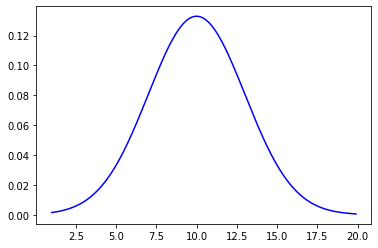

In [ ]:
from scipy import stats  
stats.norm.cdf(loc=10, scale=3, x=7)

x_plot = np.arange(1, 20, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=10, scale=3), color='blue')

In [ ]:
# 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요.

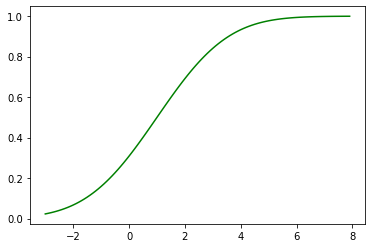

In [ ]:
stats.norm.cdf(loc=1, scale=2, x=7)

x_plot = np.arange(-3, 8, 0.1)
plt.plot(x_plot, stats.norm.cdf(x=x_plot, loc=1, scale=2), color='green')

Q7. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("/content/drive/MyDrive/5_2_fm.csv")
df1

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [ ]:
# df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.

In [ ]:
df2 = df1.copy()
df2

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [ ]:
df2 = df2.replace('A', 'C')
df2 = df2.replace('B', 'D')
df2

,species,length
0,C,2
1,C,3
2,C,4
3,D,6
4,D,8
5,D,10


In [ ]:
# df2의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성

In [ ]:
df2['length'] = np.where(df2['species'] == 'C', df2['length']*2, df2['length']*3)
df2

,species,length
0,C,4
1,C,6
2,C,8
3,D,18
4,D,24
5,D,30


In [ ]:
df = pd.concat([df1, df2])
df

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10
0,C,4
1,C,6
2,C,8
3,D,18


In [ ]:
# df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [ ]:
df.groupby('species')['length'].mean()

species
A     3.0
B     8.0
C     6.0
D    24.0
Name: length, dtype: float64

In [ ]:
df.groupby('species')['length'].std()

species
A    1.0
B    2.0
C    2.0
D    6.0
Name: length, dtype: float64

Q8. "5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성
- 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행(보너스 문제)

In [ ]:
import pandas as pd
shoes = pd.read_csv("/content/drive/MyDrive/5_2_shoes.csv")
shoes1=shoes.copy()
shoes1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [ ]:
# 4행 3열을 복사 후 추가하여 8행 3열로 작성

In [ ]:
shoes1.append(shoes1.loc[[3],['sales']])
shoes1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [ ]:
# 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')

Q9. 'titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/CAKD8_Share/평가/titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


Q10. "과자 무게의 평균이 130g으로 알려져 있다." 아래 df에서 다음 귀무가설과 대립가설에 대한 유의성 검정을 수행하세요.(정규분포, 모분산 9) 
- 귀무가설 : 감자튀김의 무게는 130g이다.
- 대립가설 : 감자튀김의 무게는 130g 보다 작다.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CAKD8_Share/평가/ch11_potato.csv')
print(df.head(),len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05 14


In [ ]:
# z 검정
sample = df.무게
s_mean = np.mean(sample)

# z 검정통계량
z = (s_mean - 130) / np.sqrt(9/14)

# 임계값
rv = stats.norm()
rv.isf(0.95)

# 유의성
rv.cdf(z)

0.026661319523126635

'무게의 평균이 130g이다.' 라고 말할 수 없다.